In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical

2023-09-10 21:01:10.156935: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
wine_data = datasets.load_wine()
print(wine_data['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [3]:
data = pd.DataFrame(data = wine_data['data'], columns = wine_data['feature_names'])
data['target'] = wine_data['target']
data.sample(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
131,12.88,2.99,2.40,20.0,104.0,1.30,1.22,0.24,0.83,5.40,0.74,1.42,530.0,2
103,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
113,11.41,0.74,2.50,21.0,88.0,2.48,2.01,0.42,1.44,3.08,1.10,2.31,434.0,1
49,13.94,1.73,2.27,17.4,108.0,2.88,3.54,0.32,2.08,8.90,1.12,3.10,1260.0,0


/var/folders/bp/y1rvrlxd0rv0sfxz36zfyq6m0000gn/T/ipykernel_29919/424064678.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['alcohol'], kde=1)


<Axes: xlabel='alcohol', ylabel='Density'>

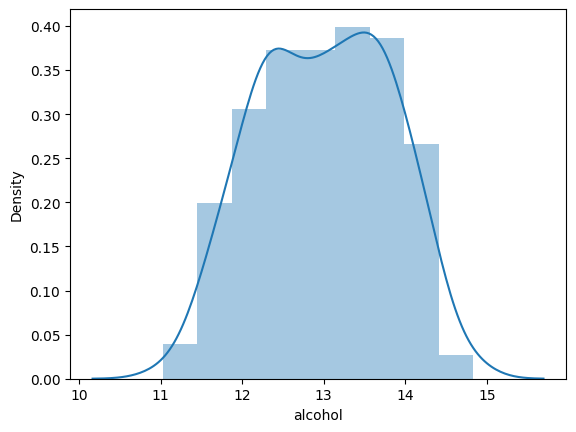

In [4]:
sns.distplot(data['alcohol'], kde=1)

In [5]:
data['target'].value_counts()
#multi-class classifier because wine can be in 3 categories

target
1    71
0    59
2    48
Name: count, dtype: int64

In [6]:
features = data.drop('target', axis=1)
target = data[['target']]

In [7]:
target = to_categorical(target, 3) #one-hot encoded
target 

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [8]:
standardScaler = StandardScaler()
processed_features = pd.DataFrame(standardScaler.fit_transform(features),
                                  columns = features.columns,
                                  index=features.index)
processed_features.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,7.943708e-15,1.002821,-2.434235,-0.788245,0.061000,0.836129,2.259772
malic_acid,178.0,3.592632e-16,1.002821,-1.432983,-0.658749,-0.423112,0.669793,3.109192
ash,178.0,-4.066660e-15,1.002821,-3.679162,-0.572122,-0.023821,0.698109,3.156325
alcalinity_of_ash,178.0,-7.983626e-17,1.002821,-2.671018,-0.689137,0.001518,0.602088,3.154511
magnesium,178.0,-7.983626e-17,1.002821,-2.088255,-0.824415,-0.122282,0.509638,4.371372
total_phenols,178.0,-3.991813e-17,1.002821,-2.107246,-0.885468,0.095960,0.808997,2.539515
flavanoids,178.0,9.979533e-16,1.002821,-1.695971,-0.827539,0.106150,0.849085,3.062832
nonflavanoid_phenols,178.0,-5.588538e-16,1.002821,-1.868234,-0.740141,-0.176095,0.609541,2.402403
proanthocyanins,178.0,-1.656602e-15,1.002821,-2.069034,-0.597284,-0.062898,0.629175,3.485073
color_intensity,178.0,-3.442939e-16,1.002821,-1.634288,-0.795103,-0.159225,0.493956,3.435432


In [10]:
x_train, x_test, y_train, y_test = train_test_split(processed_features, target,
                                                    test_size = 0.2, random_state=1)

In [12]:
class WineClassificationModel(Model):
    
    def __init__(self, input_shape): 
        super(WineClassificationModel, self).__init__()
        self.d1 = layers.Dense(128, activation = 'relu', input_shape = [input_shape])
        self.d2 = layers.Dense(64, activation = 'relu')
        self.d3 = layers.Dense(3, activation = 'softmax') # prediction layer (softmax is standard for multiclass)
        
    def call(self, x): # what is invoked in the forward pass
        x = self.d1(x)
        x = self.d2(x)
        x = self.d3(x)
        return x

In [13]:
model = WineClassificationModel(x_train.shape[1])
model.compile(optimizer = keras.optimizers.SGD(lr = 0.001),
              loss = tf.keras.losses.CategoricalCrossentropy(), #best loss function for multiclass with one hot encoding used
              metrics = ['accuracy'])

In [14]:
num_epochs = 500

In [15]:
training_history = model.fit(x_train.values, y_train, validation_split=0.2,
                             epochs = num_epochs, batch_size = 48)

Epoch 1/500
3/3 [==============================] - 1s 109ms/step - loss: 1.0013 - accuracy: 0.4513 - val_loss: 1.0153 - val_accuracy: 0.4483
Epoch 2/500
3/3 [==============================] - 0s 18ms/step - loss: 0.9614 - accuracy: 0.4867 - val_loss: 0.9752 - val_accuracy: 0.4828
Epoch 3/500
3/3 [==============================] - 0s 31ms/step - loss: 0.9221 - accuracy: 0.5487 - val_loss: 0.9404 - val_accuracy: 0.5862
Epoch 4/500
3/3 [==============================] - 0s 17ms/step - loss: 0.8862 - accuracy: 0.5929 - val_loss: 0.9137 - val_accuracy: 0.5862
Epoch 5/500
3/3 [==============================] - 0s 15ms/step - loss: 0.8534 - accuracy: 0.6460 - val_loss: 0.8846 - val_accuracy: 0.5862
Epoch 6/500
3/3 [==============================] - 0s 14ms/step - loss: 0.8223 - accuracy: 0.6726 - val_loss: 0.8540 - val_accuracy: 0.6552
Epoch 7/500
3/3 [==============================] - 0s 14ms/step - loss: 0.7918 - accuracy: 0.7257 - val_loss: 0.8314 - val_accuracy: 0.7586
Epoch 8/500
3/3 [==

In [17]:
training_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

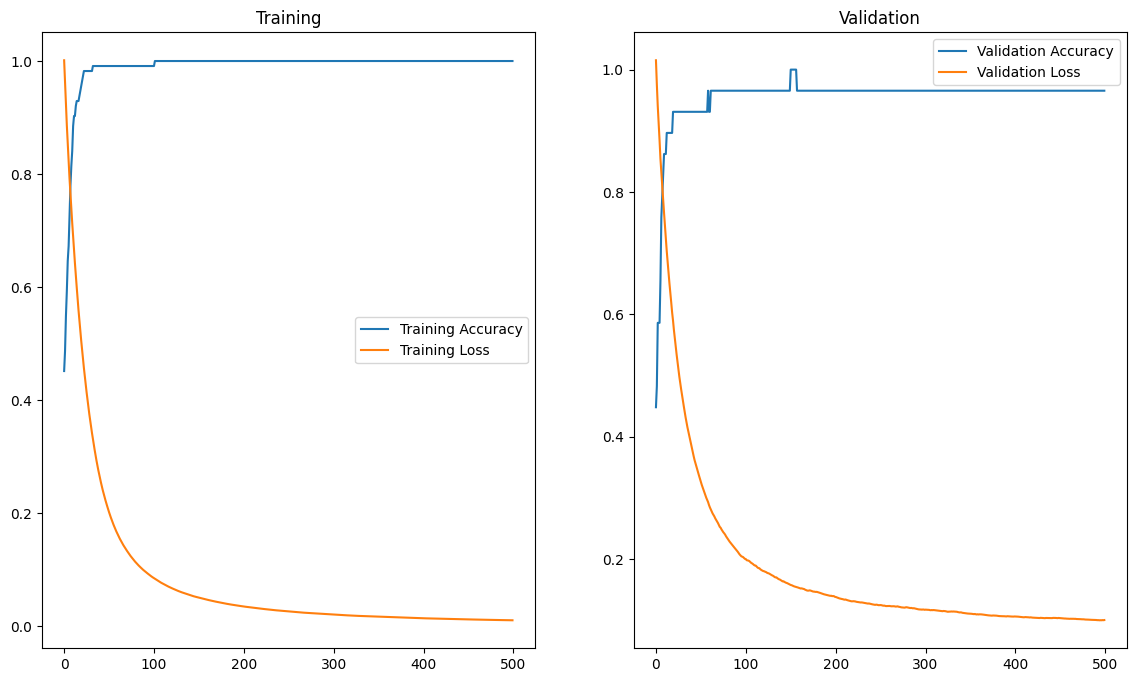

In [18]:
train_acc = training_history.history['accuracy']
train_loss = training_history.history['loss']
precision = training_history.history['val_accuracy']
recall = training_history.history['val_loss']

epochs_range = range(num_epochs)

plt.figure(figsize=(14,8))
plt.subplot(1, 2, 1)

plt.plot(epochs_range, train_acc, label = 'Training Accuracy')
plt.plot(epochs_range, train_loss, label = 'Training Loss')
plt.title('Training')
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(epochs_range, precision, label = 'Validation Accuracy')
plt.plot(epochs_range, recall, label = 'Validation Loss')
plt.title('Validation')
plt.legend()

In [19]:
score = model.evaluate(x_test, y_test)
score_df = pd.Series(score, index=model.metrics_names)
score_df

2/2 [==============================] - 0s 3ms/step - loss: 0.0230 - accuracy: 1.0000


loss        0.022976
accuracy    1.000000
dtype: float64

In [20]:
y_pred = model.predict(x_test)
y_pred[:10]

2/2 [==============================] - 0s 2ms/step


array([[1.3390036e-02, 8.8606700e-03, 9.7774929e-01],
       [1.6219972e-04, 9.9969161e-01, 1.4623426e-04],
       [9.9813265e-01, 8.3726697e-04, 1.0300578e-03],
       [1.3833451e-03, 9.9857318e-01, 4.3407548e-05],
       [9.9944866e-01, 2.9785594e-04, 2.5344704e-04],
       [1.8850042e-03, 1.8975392e-02, 9.7913963e-01],
       [7.0097386e-03, 9.8906016e-01, 3.9301370e-03],
       [9.9999517e-01, 3.3633714e-06, 1.4560405e-06],
       [8.9412596e-04, 1.3220420e-02, 9.8588544e-01],
       [2.3827089e-04, 9.9854738e-01, 1.2142397e-03]], dtype=float32)

In [21]:
y_pred = np.where(y_pred>=0.5, 1, y_pred)
y_pred = np.where(y_pred<0.5, 0, y_pred)
y_pred[:10]

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [23]:
y_test[:10]

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [24]:
accuracy_score(y_test, y_pred)

1.0